# Assignment on preprocessing
Do the following on titanic dataset
1. Load the dataset into python environment
2. Do all the necessary pre-processing steps
3. Create kNN and SVM models
4. Do k-fold and stratified stratified k-fold cross validation techniques and find
the average accuracy score of the models

In [1]:
#Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read dataset
data=pd.read_csv("titanic.csv")

In [3]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
data.shape

(891, 12)

In [5]:
#Perform exploratory data analysis
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data=data.drop(["PassengerId","Name"],axis=1)

In [8]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
#Find missing values
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [10]:
#Fill age and embarked with mean and mode

In [11]:
data["Age"]=data["Age"].fillna(data["Age"].mean())
data["Embarked"]=data["Embarked"].fillna(data["Embarked"].mode()[0])

In [12]:
#drop cabin as the number of missing values are high
data=data.drop(["Cabin"],axis=1)

In [13]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [15]:
#Encoding

In [16]:
#Perform label encoding for ticket
#Perform one hot encoding for sex and embarked

In [17]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
data["Ticket"]=lb.fit_transform(data["Ticket"])

In [18]:
data=pd.get_dummies(data)

In [19]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,523,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,596,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,669,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,49,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,472,8.0500,0,1,0,0,1


In [20]:
data.shape

(891, 12)

# KNN Model Building

In [21]:
#Checking if its a balance or imbalanced data
data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [22]:
#Split data
X=data.drop("Survived",axis=1)

In [23]:
y=data["Survived"]

# Split the data

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [25]:
#Find optimum number of cluster for knn model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
k=[]
neighbors=range(3,15)
for i in neighbors:
    kn=KNeighborsClassifier(n_neighbors=i)
    kn=kn.fit(X_train,y_train)
    y_kn=kn.predict(X_test)
    acc=accuracy_score(y_test,y_kn)
    k.append(acc)


In [26]:
print(k)


[0.6502242152466368, 0.6367713004484304, 0.6681614349775785, 0.7040358744394619, 0.6860986547085202, 0.6860986547085202, 0.7085201793721974, 0.7130044843049327, 0.7040358744394619, 0.7040358744394619, 0.6995515695067265, 0.6905829596412556]


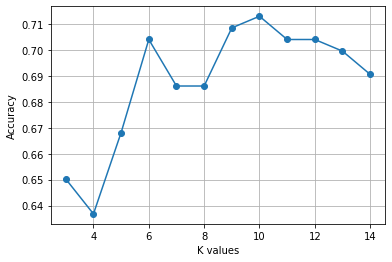

In [27]:
plt.plot(neighbors,k,"o-")
plt.xlabel("K values")
plt.ylabel("Accuracy")
plt.grid()
#From the graph its clear that the optimun number of clusters is 10. but for more accurate value we take it as 9

In [28]:
#Build the model with k=9
kn_model=KNeighborsClassifier(n_neighbors=9)
kn_model=kn_model.fit(X_train,y_train)
y_knmodel=kn_model.predict(X_test)


In [29]:
#Calculate the score
score_kn=kn_model.score(X_test,y_test)
score_kn

0.7085201793721974

# K-fold cross validation

In [30]:
from sklearn.model_selection import KFold

In [31]:
kfold_val=KFold(11)


In [32]:
for train_index,test_index in kfold_val.split(X,y):
    print("Training Index:", train_index)
    print("Test Index :",test_index)

Training Index: [ 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152
 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170
 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188
 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206
 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224
 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242
 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260
 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278
 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296
 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314
 315 316 317 318 319 320 321 322 32

In [33]:
#calculate cross validation score
from sklearn.model_selection import cross_val_score
cs_kn=cross_val_score(kn_model,X,y,cv=kfold_val)
cs_kn

array([0.65432099, 0.69135802, 0.62962963, 0.71604938, 0.67901235,
       0.71604938, 0.7037037 , 0.71604938, 0.72839506, 0.77777778,
       0.75308642])

In [34]:
#Average of K_fold
np.mean(cs_kn)

0.7059483726150392

# Stratified k-fold cross validation

In [35]:
from sklearn.model_selection import StratifiedKFold
skfold_val=StratifiedKFold(n_splits=11)


In [36]:
for train_index,test_index in skfold_val.split(X,y):
    print("Training Index:", train_index)
    print("Test Index :",test_index)

Training Index: [ 74  78  79  81  82  84  85  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152
 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170
 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188
 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206
 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224
 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242
 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260
 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278
 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296
 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314
 315 316 317 318 319 320 321 322 32

In [37]:
#calculate stratified cross validation score
sf_kn=cross_val_score(kn_model,X,y,cv=skfold_val)
sf_kn

array([0.66666667, 0.62962963, 0.65432099, 0.71604938, 0.64197531,
       0.71604938, 0.7037037 , 0.74074074, 0.7037037 , 0.72839506,
       0.7654321 ])

In [38]:
#Average of stratified kfold
np.mean(sf_kn)

0.696969696969697

# SVM Model Building

In [39]:
from sklearn.svm import SVC
svm_model=SVC(kernel="linear")

In [40]:
svm_model=svm_model.fit(X_train,y_train)
y_svm=svm_model.predict(X_test)

In [41]:
#Calculate the score
score_svm=svm_model.score(X_test,y_test)
score_svm

0.7847533632286996

# K-Fold Cross Validation

In [42]:
from sklearn.model_selection import KFold
kf_svm=KFold(11)

In [43]:
for train_index,test_index in kf_svm.split(X,y):
    print("Train_index:", train_index)
    print("Test_ index:", test_index)

Train_index: [ 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152
 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170
 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188
 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206
 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224
 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242
 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260
 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278
 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296
 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314
 315 316 317 318 319 320 321 322 323 3

In [44]:
svm_val=cross_val_score(svm_model,X,y,cv=kf_svm)
svm_val

array([0.80246914, 0.81481481, 0.79012346, 0.77777778, 0.83950617,
       0.7654321 , 0.77777778, 0.71604938, 0.79012346, 0.80246914,
       0.80246914])

In [45]:
#Average value of kfold method
np.mean(svm_val)

0.7890011223344557

# Stratified K Fold Validation

In [46]:
svm_st=StratifiedKFold(n_splits=11)
for train_index,test_index in svm_st.split(X,y):
    print("Training Index:", train_index)
    print("Test Index :",test_index)

Training Index: [ 74  78  79  81  82  84  85  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152
 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170
 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188
 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206
 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224
 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242
 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260
 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278
 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296
 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314
 315 316 317 318 319 320 321 322 32

In [47]:
svm_strat=cross_val_score(svm_model,X,y,cv=svm_st)
svm_strat

array([0.82716049, 0.7654321 , 0.80246914, 0.79012346, 0.85185185,
       0.7654321 , 0.75308642, 0.75308642, 0.7654321 , 0.82716049,
       0.77777778])

In [48]:
#calculate average stratified score of svm model
np.mean(svm_strat)

0.7890011223344557

# From the above case study we observed that:

KNearest neighbor model's K-fold cross validation average is: 0.7059

KNearest neighbor model's Stratified K-fold cross validation average is: 0.6969

SVM models's K-fold cross validation average is: 0.7890

SVM model's Stratified K-fold cross validation average is: 0.7890